*********************************************************************************************************************
1. Import your data into a Pandas DataFrame.
2. Merge your DataFrames.
3. Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the
total number of drivers for each city type, including urban, suburban, and rural.
4. Determine the mean, median, and mode for the following:
    
    A) The total number of rides for each city type.
    B) The average fares for each city type.
    C) The total number of drivers for each city type.
5. Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    
    A) The number of rides for each city type.
    B) The fares for each city type.
    C) The number of drivers for each city type.
6. Create a pie chart that visualizes each of the following data for each city type:
    
    A) The percent of total fares.
    B) The percent of total rides.
    C) The percent of total drivers.

In [1]:
%matplotlib inline
# Import dependencies.
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd
# Import stats module from SciPy.
import scipy.stats as sts

In [2]:
# Load in city csv
city_df = pd.read_csv("Resources/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Lets Review the table

# Get the columns and the rows that are not null.
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

*****************************************************************************************************************************
Lets Explore the Tables
*****************************************************************************************************************************

In [4]:
# Get the columns and the rows that are not null.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get the data types of each column.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Load in city csv
ride_df = pd.read_csv("Resources/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [7]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_df["type"]=="Urban")

66

In [9]:
# Get the number of data points from the Suburban cities.
sum(city_df["type"]=="Suburban")

36

In [10]:
# Get the number of data points from the Rural cities.
sum(city_df["type"]=="Rural")

18

In [11]:
# Get the columns and the rows that are not null.
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

**************************************************************************************************************************
Both Tables Are Clean and Ready to Merge

1) The columns in the city_data_df are:

    A) city
    B) driver_count
    C) type

2) The columns in the ride_data_df are:

    A) city
    B) date
    C) fare
    D) ride_id
    
When we merge two DataFrames, we merge on a column with the same data, and the same column name,
in both DataFrames. We use the following syntax to do that:

new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

We may have to merge the DataFrames using the how= parameter either left, right, inner, or outer
depending how we want to merge the DataFrames. The default is inner
****************************************************************************************************************************

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


**************************************************************************************************************************
In the pyber_data_df DataFrame, all the columns from the city_data_df are the first four columns after the index. The driver_count and type columns from the
ride_data_df are added at the end, as shown in the following image

To see the image: https://courses.bootcampspot.com/courses/676/pages/5-dot-2-4-explore-the-data-in-pandas?module_item_id=189873
**************************************************************************************************************************

For the bubble chart, we will need to plot the following:

The average fare for each type of city on the y-axis
The total number of rides for each type city on the x-axis
Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
Here are the steps to create a bubble chart:

To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.
Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

Let's create three separate DataFrames, one for each type of city.

In [15]:
# Create a data frame for each city type: Urban, Suburban, and Rural

# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


To get the number of rides for each city by each type of city, we have to create a Series where the index is the name
of the city and the column is the number of rides for that city.

We'll use the groupby() function to create a Series of data that has the name of the city as the index, apply the count() 
method to the Series for each city, and select the ride_id column.

In [16]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Now apply the same logice for suburban and rural ride count:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

We now have one of the three datasets we need to create a bubble chart. Next, we'll use the groupby()
function on the city type DataFrames to get the average fare for each city type. This will be our second dataset.

Now that you have the rides parsed by city type, you look at the bubble chart Omar gave you and realize that you
need to get the average city fare for each city type. 

Using the separate DataFrames for each city type, we can calculate the average fare for each city in the
urban, suburban, and rural cities. Using the groupby() function, we can chain the mean() method to get the 
averages of the fare column.

In [18]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Now apply the same logice for suburban and rural ride count:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

Now we have two of three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type
DataFrames to get the average number of drivers for each city type.This will be our third and final dataset.

With the number of rides and the average fare for each city type, you can create a simple scatter, but Omar said that
V. Isualize wants to see how the rides and fare data stack are affected by the average number of drivers for each city type.
This will help V. Isualize make key decisions about where resources and support are needed.

The last data point we need for our bubble chart is the average number of drivers for each city in the 
urban, suburban, and rural cities.

To get the average number of drivers for each city in the urban, suburban, and rural cities, we can use the groupby() function
and get the mean() of the driver_count column.

In [20]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [21]:
# Now apply the same logice for suburban and rural ride count:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

Our first task will be to create a scatter plot for each type of city where the following conditions are met:

The x-axis is the number of rides for each city.
The y-axis is the average fare for each city.
The size of each marker is the average number of drivers in each city.
Let's create each scatter plot individually and add them all to one chart.

The first scatter plot we'll make is for urban cities. We'll create our plots using the MATLAB method.

To the plt.scatter() function, let's add the x- and y-axis data, where the x-axis is the urban_ride_count and the y-axis
is the urban_avg_fare.

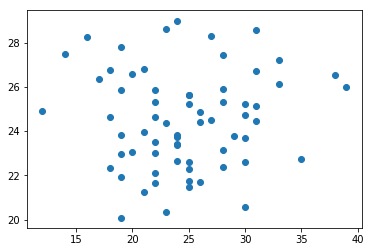

In [22]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

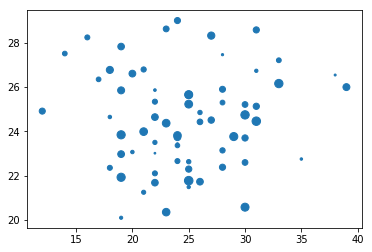

In [23]:
# To change the size of the markers, add the s= parameter to the scatter() function.
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

Some of the bubbles are still too small, so let's increase the size by a factor of 10 and add a black edge color to the 
circles that have a line width of 1. While we're changing these features, let's pay homage to the company's color scheme
and make the urban markers coral and 20% transparent. We can also add a title, labels for the axes, a legend, and a grid.

To change the marker color, we add the color= parameter to the scatter() function.

To add a title, x-axis and y-axis labels, and a legend, we use the plt.title(), plt.ylabel(), plt.xlabel(),
and plt.legend() functions, respectively.

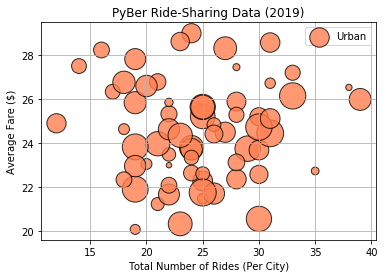

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

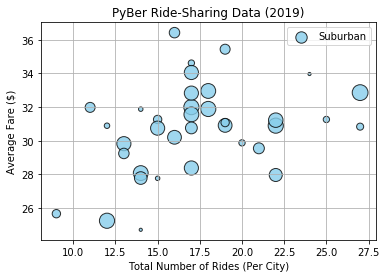

In [25]:
# Let's create the same bubble chart as we did for the urban cities chart but change the color to sky blue for suburban.

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

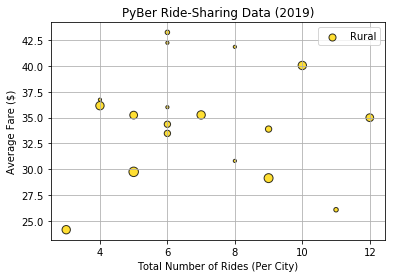

In [26]:
# Build the scatter plots for rural cities using gold.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

To create a bubble chart that showcases all the different city types in one chart, 
we'll combine our three scatter plot code blocks in one Jupyter Notebook cell.

Add the three plt.scatter() functions for each chart to one cell and run the cell.

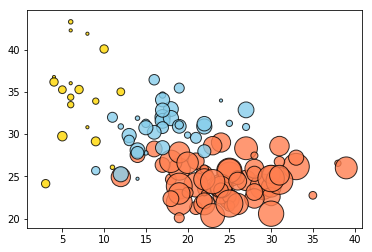

In [27]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

Let's add a title, labels for the axes, a legend, and a grid for all three charts and increase the font size
of the axes labels to 12 and the title to 20. We'll also enlarge the figure so the markers are more spread out.

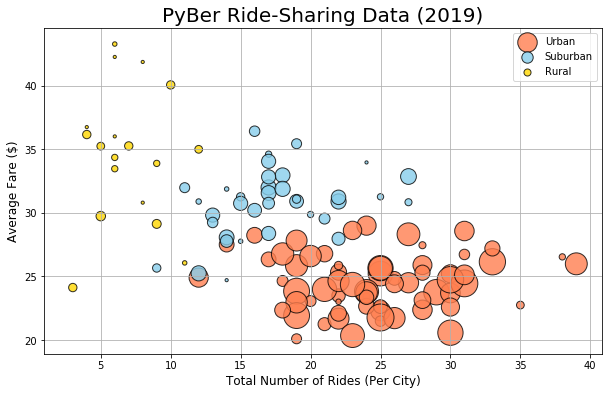

In [28]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

Did you notice something that we need to fix? The markers in the legend have different sizes, which are automatically
determined based on the average size of the marker. Therefore, we'll need to customize the legend to scale them to the same size.
We can declare a variable for the legend function, lgnd = plt.legend(), and add parameters for font size, legend location, 
and legend title, along with some other features.After we declare the variable for the legend, we can use 
legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size. Inside the brackets, we can add the
list element for the number of markers in the legend.

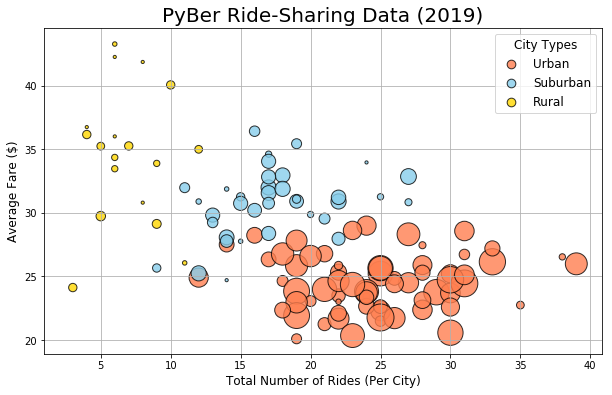

In [29]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the plot
plt.show()



For above legend:
    
Let's break down what this code is doing for the legend:

We made the font size for the text "small" with fontsize=.
Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing
the number.The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
We added a legend title.We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute
and list indexing in the brackets to reference one of the three scatter plots. Finally, we increased the font size of the 
legend title to 12.

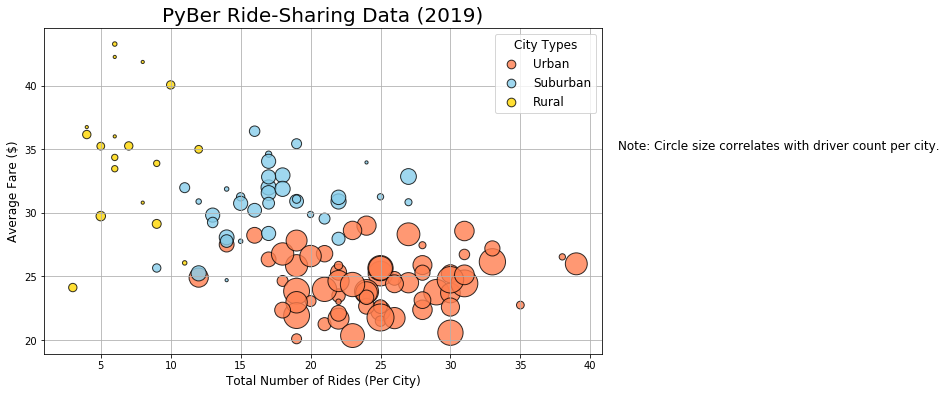

In [59]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()

For note above: Next, we need to add a note to the right of the chart to let the viewer know that the circle size correlates 
    with the driver count for each city. Our note will say: "Note: Circle size correlates with driver count per city." To do this,
    we'll use the plt.text() function and add the text.

The old adage "There are many ways to skin a cat" comes to mind when getting the summary statistics. 
We'll use and compare the following three ways to calculate the summary statistics:

The Pandas describe() function on the DataFrame or Series.
The Pandas mean(), median(), and mode() methods on a Series.
The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

In [32]:
# Get urban_cities summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [33]:
# Get suburban_cities summary statistics.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [34]:
# Get rural_cities summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [35]:
# Get urban_ride_count summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
# Get suburban_ride_count summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
# Get rural_ride_count summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# If we want to get the mean without all of the summary of statistics, use the mean() function:

# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
# If we want to get the median, use the median() function:

# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
# If we want to get the mode(s) of urban_ride_count, use the mode() function:

# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2)
#round(suburban_ride_count.mode(),2)
#round(rural_ride_count.mode(),2)

0    22
1    25
dtype: int64

In [41]:
# Another way to calculate mean, median, mode for urban_ride_count:

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_sts_urban_ride_count = sts.mode(urban_ride_count)
print(f"The sts_mode for the ride counts for urban trips is {mode_sts_urban_ride_count}.")

# The diff between how mode is presented with sts is that sts provides the number of times the mode appears in the dataset.

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The sts_mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [42]:
# Another way to calculate mean, median, mode for urban_ride_count:

# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_sts_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The sts_mode for the ride counts for suburban trips is {mode_sts_suburban_ride_count}.")

# The diff between how mode is presented with sts is that sts provides the number of times the mode appears in the dataset.

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The sts_mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [43]:
# Another way to calculate mean, median, mode for urban_ride_count:

# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_sts_rural_ride_count = sts.mode(rural_ride_count)
print(f"The sts_mode for the ride counts for rural trips is {mode_sts_rural_ride_count}.")

# The diff between how mode is presented with sts is that sts provides the number of times the mode appears in the dataset.

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The sts_mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [44]:
# Lightbulb: Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
#Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [47]:
#Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [48]:
# Lets get the summary statitics on the number of drivers in each city type

# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [49]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of driver for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

The mean number of driver for urban trips is 36.68.
The median number of drivers for urban trips is 37.00.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [50]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of driver for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean number of driver for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [51]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of driver for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of driver for rural trips is 4.30.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


Box-and-whisker plots are an effective way to show a lot of information about distribution in a small amount of space,
especially outliers. Creating a box-and-whisker plot requires that we use the ax.boxplot() function, which takes an array
inside the parentheses.

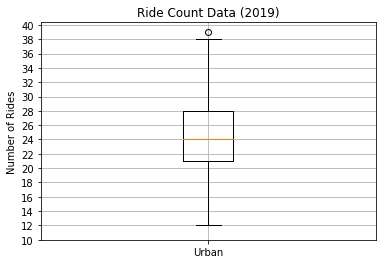

In [52]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

First, we create the x-axis labels with a list, x_labels = ["Urban"].
Next, the data and labels are passed in the boxplot function.
Finally, we set the y_ticks with a range from 10 to 41 with ticks at an increment of 2. 
This will help determine where the minimum and maximum lie as well as any outliers.

Looking at this box-and-whisker plot, we can see:

    -There is at least one outlier, which is close to 40. This our maximum data point, 39.

    -The minimum is 12.

    -The median is 24 or the 50th percentile.

    -The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

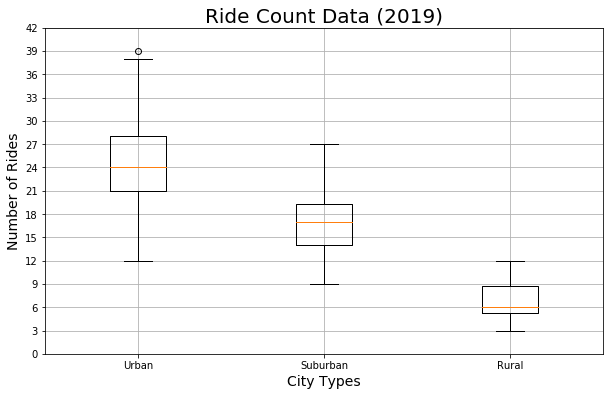

In [66]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban
and suburban cities, respectively.

Recall that the urban_ride_count is a Series with the index of the city and the data the number of rides for each city.
We can get all the "True" values where the urban_ride_count equals 39. Then, we can filter the urban_ride_count Series 
for all the "True" values and get the city name from the index, 

In [54]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


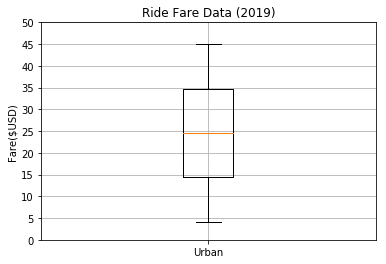

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [55]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

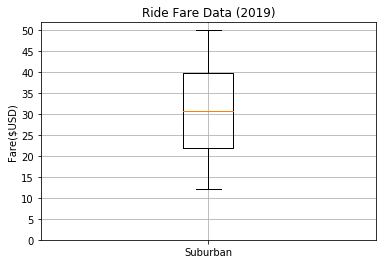

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [56]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

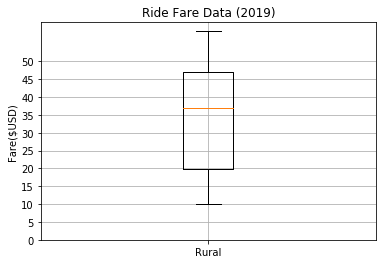

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [57]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

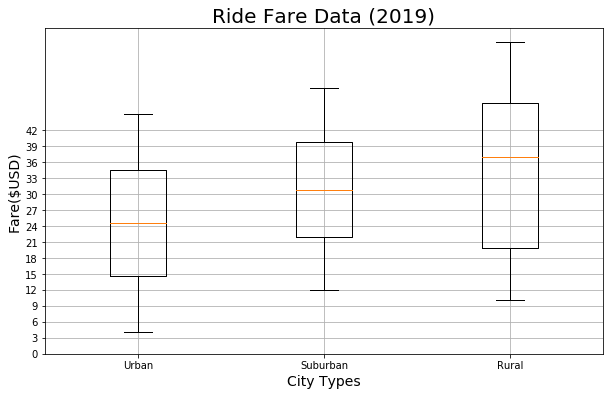

In [74]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

 Let's create a box-and-whisker plot for the driver count data with summary statistics.

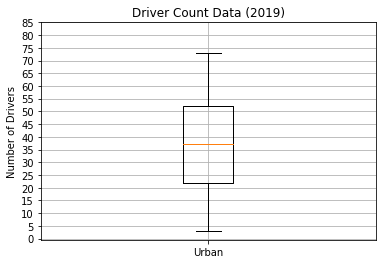

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [70]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

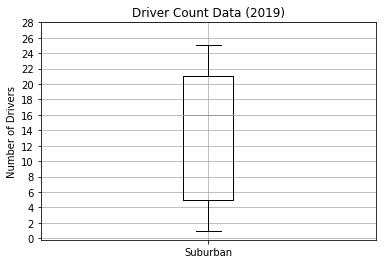

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

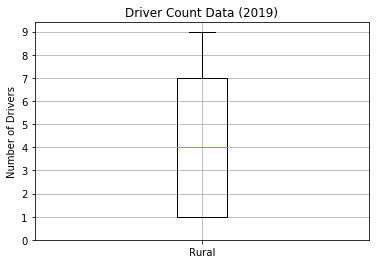

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

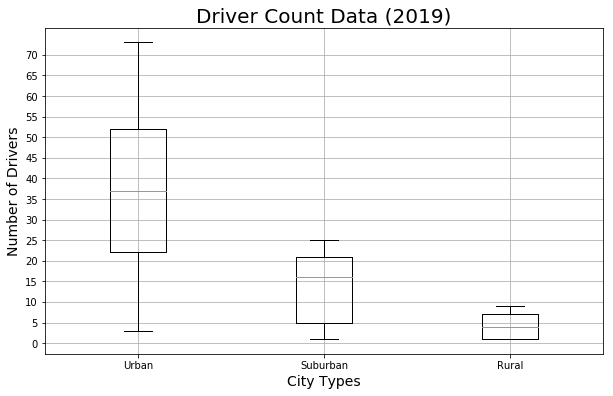

In [75]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()